In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [120]:
df = pd.read_csv("diabetes.csv") 

In [121]:
cols =list(df.columns)

In [122]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [124]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

    Pregnancies: Number of times pregnant

    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    BloodPressure: Diastolic blood pressure (mm Hg)

    SkinThickness: Triceps skin fold thickness (mm)

    Insulin: 2-Hour serum insulin (mu U/ml)

    BMI: Body mass index (weight in kg/(height in m)^2)

    DiabetesPedigreeFunction: Diabetes pedigree function

    Age: Age (years)

    Outcome: Class variable (0 or 1)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [126]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


For Age , it looks like there is no outliers

In [127]:
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [128]:
df.Pregnancies.corr(df['Age'])

0.54434122840233901

In [129]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [130]:
normalized_df=(df-df.mean())/df.std()

In [131]:
normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006


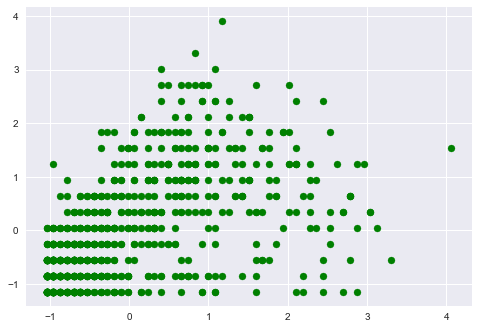

In [132]:
plt.scatter(normalized_df['Age'], normalized_df['Pregnancies'], color='g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000024085A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002887B390>]], dtype=object)

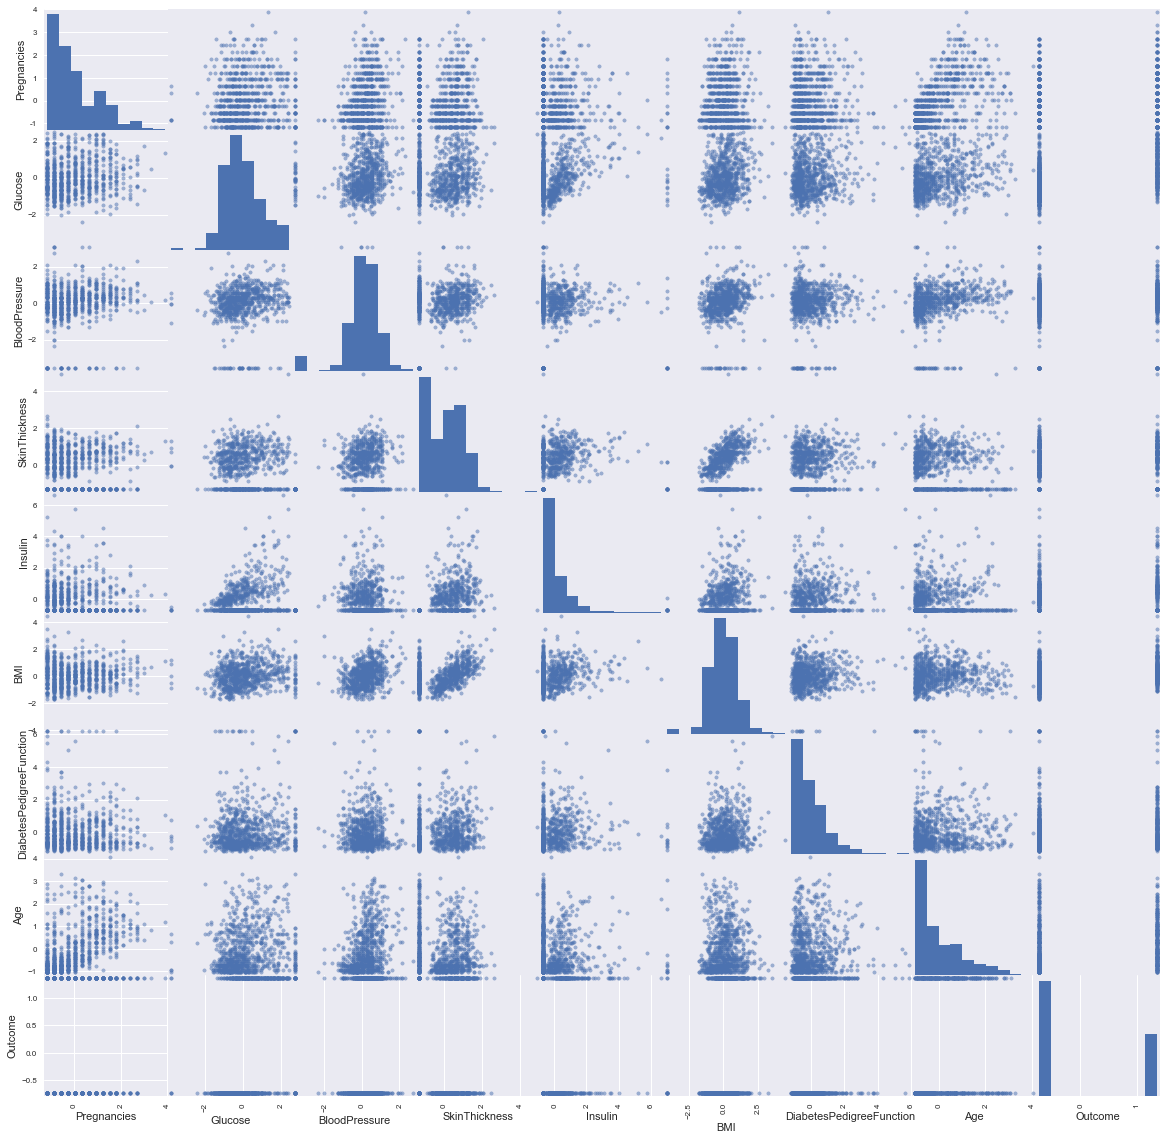

In [133]:
pd.scatter_matrix(normalized_df,figsize=(20,20))

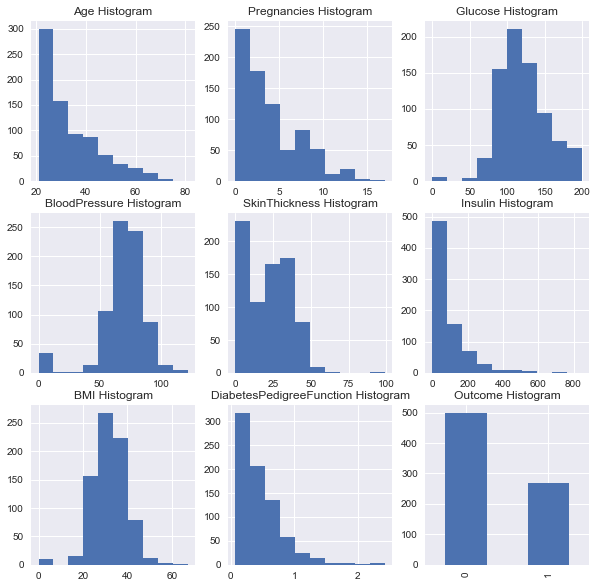

In [134]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 3)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pregnancies'].hist()
plt.title('Pregnancies Histogram')


# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df['Glucose'].hist()
plt.title('Glucose Histogram')



# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (1, 0))
df['BloodPressure'].hist()
plt.title('BloodPressure Histogram')



# Plot SkinThickness counts
plt.subplot2grid(fig_dims, (1, 1))
df['SkinThickness'].hist()
plt.title('SkinThickness Histogram')




# Plot Insulin counts
plt.subplot2grid(fig_dims, (1, 2))
df['Insulin'].hist()
plt.title('Insulin Histogram')


# Plot BMI counts
plt.subplot2grid(fig_dims, (2, 0))
df['BMI'].hist()
plt.title('BMI Histogram')


# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (2, 1))
df['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')



# Plot Outcome counts
plt.subplot2grid(fig_dims, (2, 2))
df['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')



# Missing Values

In [135]:
df.isnull().values.ravel().sum()

0

In [136]:
df_train = df.drop(['Outcome','Pregnancies'], axis=1)

In [137]:
df_train[df_train==0.0]= None

In [138]:
df_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33


In [139]:
df_train.shape[0]

768

In [140]:
hmz=df_train.isnull().values.sum(axis=1)

In [141]:
hmz[hmz>0].shape

(376L,)

376 is the number of rows where was one missing value and not in Pregnancies and Outcome

In [142]:
hmz=df_train.isnull().values.sum(axis=0)

In [143]:
hmz

array([  5,  35, 227, 374,  11,   0,   0])

How many missing values in each attribute : [  5,  35, 227, 374,  11,   0,   0]
Consider 'SkinThickness' and 'Insulin' have too many missing values, we decide to drop these attribute

In [144]:
# Glucose
df_train[df_train['Glucose'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
75,NaN,48.0,20.0,NaN,24.7,0.140,22
182,NaN,74.0,20.0,23.0,27.7,0.299,21
342,NaN,68.0,35.0,NaN,32.0,0.389,22
349,NaN,80.0,32.0,NaN,41.0,0.346,37
502,NaN,68.0,41.0,NaN,39.0,0.727,41


In [145]:
# To keep Glucose in tact, make a copy of it called GlucoseFill 
# that we will use to fill in the missing Glucose:
df_train['GlucoseFill'] = df_train['Glucose']

# Populate GlucoseFill
df_train['GlucoseFill'] = df_train['GlucoseFill'].groupby([df['Outcome']]).apply(lambda x: x.fillna(x.median()))

In [146]:
len(df_train[df_train['GlucoseFill'].isnull()])

0

In [147]:
df_train[df_train['Glucose'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlucoseFill
75,NaN,48.0,20.0,NaN,24.7,0.140,22,107.0
182,NaN,74.0,20.0,23.0,27.7,0.299,21,107.0
342,NaN,68.0,35.0,NaN,32.0,0.389,22,107.0
349,NaN,80.0,32.0,NaN,41.0,0.346,37,140.0
502,NaN,68.0,41.0,NaN,39.0,0.727,41,140.0


In [148]:
# BloodPressure
df_train[df_train['BloodPressure'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlucoseFill
7,115.0,NaN,NaN,NaN,35.3,0.134,29,115.0
15,100.0,NaN,NaN,NaN,30.0,0.484,32,100.0
49,105.0,NaN,NaN,NaN,NaN,0.305,24,105.0
60,84.0,NaN,NaN,NaN,NaN,0.304,21,84.0
78,131.0,NaN,NaN,NaN,43.2,0.270,26,131.0


In [149]:
# To keep BloodPressure in tact, make a copy of it called BloodPressureFill 
# that we will use to fill in the missing BloodPressure:
df_train['BloodPressureFill'] = df_train['BloodPressure']

# Populate GlucoseFill
df_train['BloodPressureFill'] = df_train['BloodPressureFill'].groupby([df['Outcome']]).apply(lambda x: x.fillna(x.median()))

In [150]:
len(df_train[df_train['BloodPressureFill'].isnull()])

0

In [151]:
df_train[df_train['BloodPressure'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill
7,115.0,NaN,NaN,NaN,35.3,0.134,29,115.0,70.0
15,100.0,NaN,NaN,NaN,30.0,0.484,32,100.0,74.5
49,105.0,NaN,NaN,NaN,NaN,0.305,24,105.0,70.0
60,84.0,NaN,NaN,NaN,NaN,0.304,21,84.0,70.0
78,131.0,NaN,NaN,NaN,43.2,0.270,26,131.0,74.5


In [152]:
# BMI
df_train[df_train['BMI'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill
9,125.0,96.0,NaN,NaN,NaN,0.232,54,125.0,96.0
49,105.0,NaN,NaN,NaN,NaN,0.305,24,105.0,70.0
60,84.0,NaN,NaN,NaN,NaN,0.304,21,84.0,70.0
81,74.0,NaN,NaN,NaN,NaN,0.102,22,74.0,70.0
145,102.0,75.0,23.0,NaN,NaN,0.572,21,102.0,75.0


In [153]:
# To keep BMI in tact, make a copy of it called BMIFill 
# that we will use to fill in the missing BMI:
df_train['BMIFill'] = df_train['BMI']

# Populate BMIFill
df_train['BMIFill'] = df_train['BMIFill'].groupby([df['Outcome']]).apply(lambda x: x.fillna(x.median()))

In [154]:
len(df_train[df_train['BMIFill'].isnull()])

0

In [155]:
# BMI
df_train[df_train['BMI'].isnull()].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill
9,125.0,96.0,NaN,NaN,NaN,0.232,54,125.0,96.0,34.3
49,105.0,NaN,NaN,NaN,NaN,0.305,24,105.0,70.0,30.1
60,84.0,NaN,NaN,NaN,NaN,0.304,21,84.0,70.0,30.1
81,74.0,NaN,NaN,NaN,NaN,0.102,22,74.0,70.0,30.1
145,102.0,75.0,23.0,NaN,NaN,0.572,21,102.0,75.0,30.1


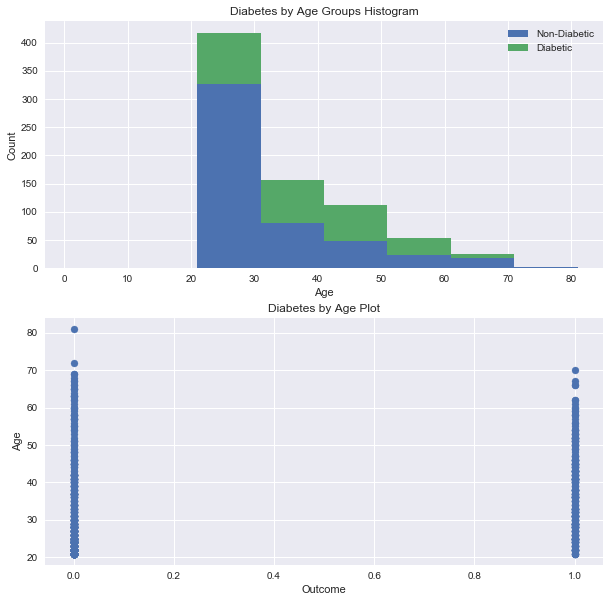

In [156]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Histogram of Age segmented by Outcome
df1 = df[df['Outcome'] == 0]['Age']
df2 = df[df['Outcome'] == 1]['Age']
max_age = max(df['Age'])
axes[0].hist([df1, df2], 
             bins=max_age / 10, # bin_size
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Non-Diabetic', 'Diabetic'), loc='best')
axes[0].set_title('Diabetes by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Outcome and Age
axes[1].scatter(df['Outcome'], df['Age'])
axes[1].set_title('Diabetes by Age Plot')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Age')

From the plot it appears like at younger ages, the ratio of non diabetic to diabetic individuals is higher than in middle ages, however, also, in ages from 60 onwards, it seems non diabetic individuals are more, probably, because they were able to survive to older ages more than their diabetic counterparts when they were in middle ages

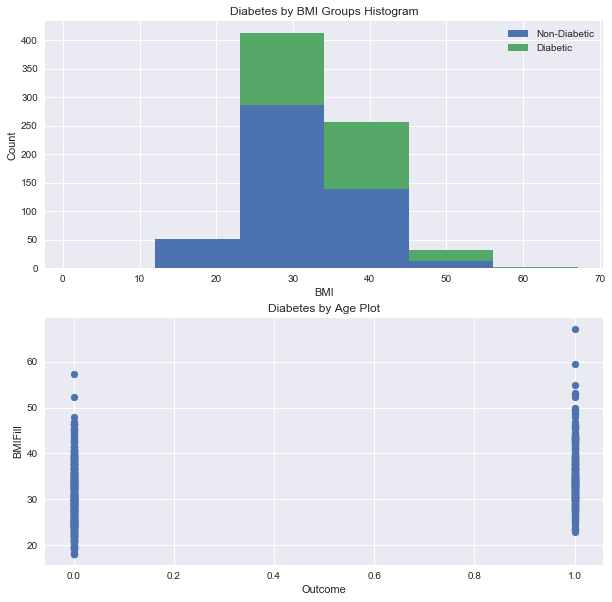

In [157]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Histogram of BMIFill segmented by Outcome
df1 = df[df['Outcome'] == 0]['BMI']
df2 = df[df['Outcome'] == 1]['BMI']
max_BMI = max(df_train['BMIFill'])
axes[0].hist([df1, df2], 
             bins=max_BMI / 10, # bin_size
             range=(1, max_BMI), 
             stacked=True)
axes[0].legend(('Non-Diabetic', 'Diabetic'), loc='best')
axes[0].set_title('Diabetes by BMI Groups Histogram')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')

# Scatter plot Outcome and BMIFill
axes[1].scatter(df['Outcome'], df_train['BMIFill'])
axes[1].set_title('Diabetes by Age Plot')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('BMIFill')

In [158]:
df_train = df_train.drop(['Glucose','BloodPressure','SkinThickness','Insulin','BMI'], axis=1)
df_train['Pregnancies'] = df['Pregnancies']
df_train['Outcome'] = df['Outcome']
df_train.head()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
0,0.627,50,148.0,72.0,33.6,6,1
1,0.351,31,85.0,66.0,26.6,1,0
2,0.672,32,183.0,64.0,23.3,8,1
3,0.167,21,89.0,66.0,28.1,1,0
4,2.288,33,137.0,40.0,43.1,0,1


In [159]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DiabetesPedigreeFunction       Axes(0.125,0.657941;0.227941x0.222059)
Age                         Axes(0.398529,0.657941;0.227941x0.222059)
GlucoseFill                 Axes(0.672059,0.657941;0.227941x0.222059)
BloodPressureFill              Axes(0.125,0.391471;0.227941x0.222059)
BMIFill                     Axes(0.398529,0.391471;0.227941x0.222059)
Pregnancies                 Axes(0.672059,0.391471;0.227941x0.222059)
dtype: object

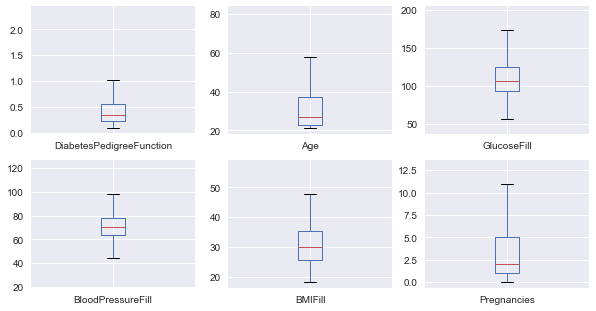

In [160]:
df_boxplot = df_train.drop(['Outcome'], axis=1)
df_boxplot[df_train['Outcome']==0].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

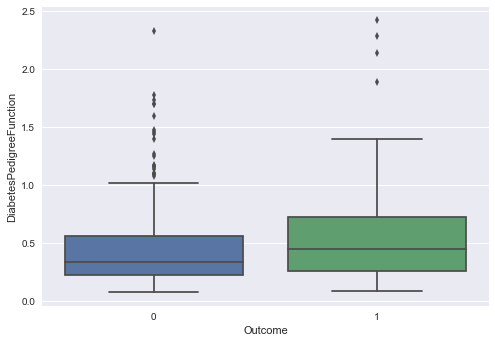

In [181]:
import seaborn as sns
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction',data=df_train)

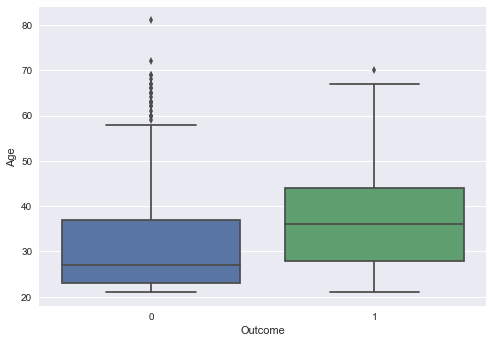

In [184]:
sns.boxplot(x = 'Outcome', y = 'Age',data=df_train)

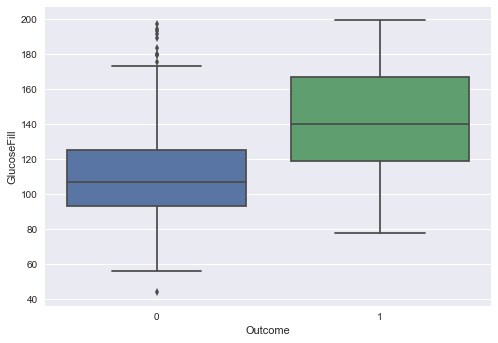

In [179]:
sns.boxplot(x = 'Outcome', y = 'GlucoseFill',data=df_train)

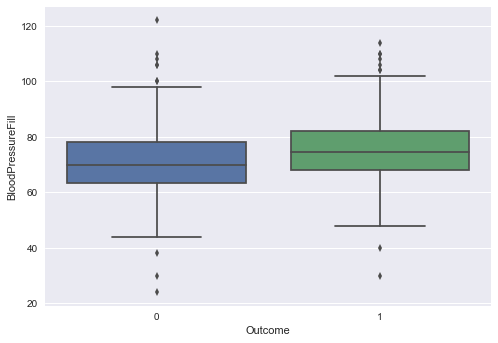

In [53]:
sns.boxplot(x = 'Outcome', y = 'BloodPressureFill',data=df_train)             

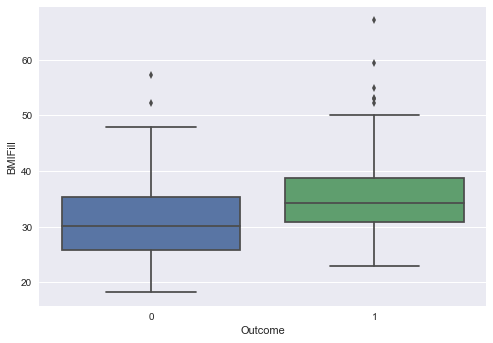

In [54]:
sns.boxplot(x = 'Outcome', y = 'BMIFill',data=df_train)     

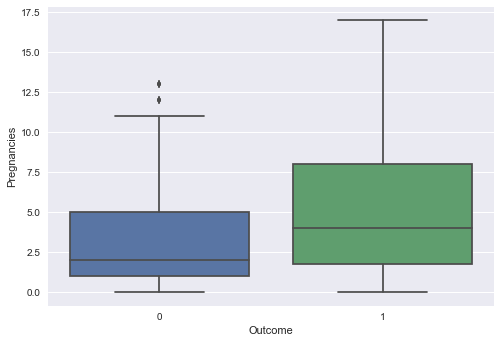

In [55]:
sns.boxplot(x = 'Outcome', y = 'Pregnancies',data=df_train) 

Outliers need to be exclude:

In [194]:
#df_clean = df_train[((df_train["Outcome"]==1)|(df_train["Outcome"]==0) & (df_train['DiabetesPedigreeFunction']<=df_train.iloc[(int)(df_train['DiabetesPedigreeFunction'].quantile(0.75))]['DiabetesPedigreeFunction']*1.5))&
#                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['Age']<=df_train.iloc[(int)(df_train['Age'].quantile(0.75))]['Age']*1.5)))&
#                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['GlucoseFill']<=df_train.iloc[(int)(df_train['GlucoseFill'].quantile(0.75))]['GlucoseFill']*1.5)))&
#                    (((df_train["Outcome"]==1) & (df_train['BloodPressureFill']>=df_train.iloc[(int)(df_train['BloodPressureFill'].quantile(0.25))]['BloodPressureFill']/1.5))|((df_train["Outcome"]==0) & (df_train['BloodPressureFill']<=df_train.iloc[(int)(df_train['BloodPressureFill'].quantile(0.75))]['BloodPressureFill']*1.5)))&
#                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['BMIFill']<=df_train.iloc[(int)(df_train['BMIFill'].quantile(0.75))]['BMIFill']*1.5)))&
#                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['Pregnancies']<=df_train.iloc[(int)(df_train['Pregnancies'].quantile(0.75))]['Pregnancies']*1.5)))
#                   ]

In [245]:
df_clean = df_train[((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['DiabetesPedigreeFunction']<=0.96)))&
                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['Age']<=58)))&
                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['GlucoseFill']<=174)))&
                    (((df_train["Outcome"]==1) & (df_train['BloodPressureFill']>=45))|((df_train["Outcome"]==0) & (df_train['BloodPressureFill']<= 99)))&
                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['BMIFill']<=48)))&
                    ((df_train["Outcome"]==1)|((df_train["Outcome"]==0) & (df_train['Pregnancies']<=11)))
                   ]

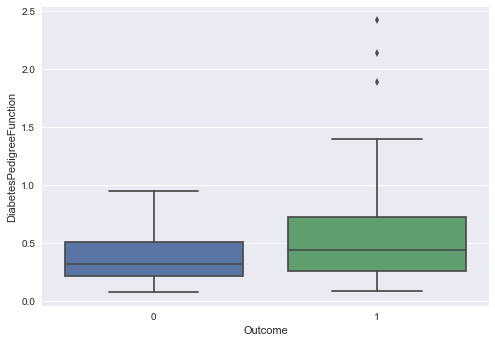

In [233]:
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction',data=df_clean) 

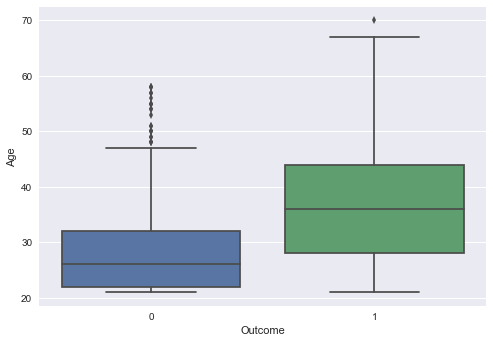

In [238]:
sns.boxplot(x = 'Outcome', y = 'Age',data=df_clean) 

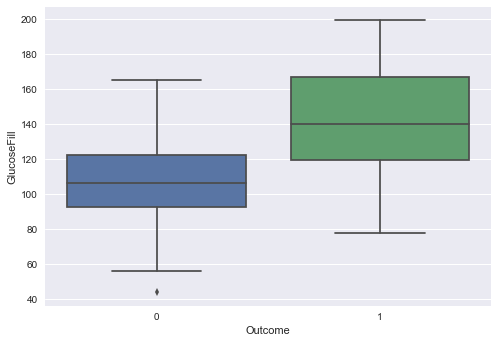

In [246]:
sns.boxplot(x = 'Outcome', y = 'GlucoseFill',data=df_clean) 

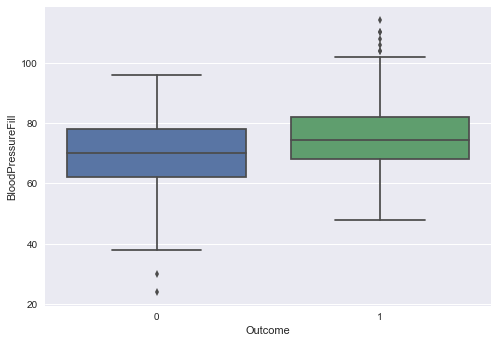

In [240]:
sns.boxplot(x = 'Outcome', y = 'BloodPressureFill',data=df_clean) 

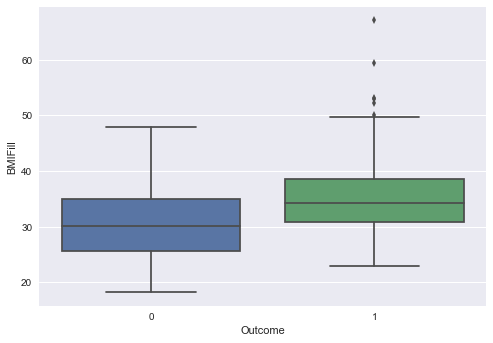

In [249]:
sns.boxplot(x = 'Outcome', y = 'BMIFill',data=df_clean) 

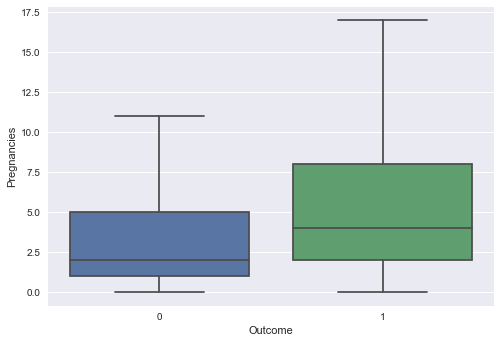

In [250]:
sns.boxplot(x = 'Outcome', y = 'Pregnancies',data=df_clean) 

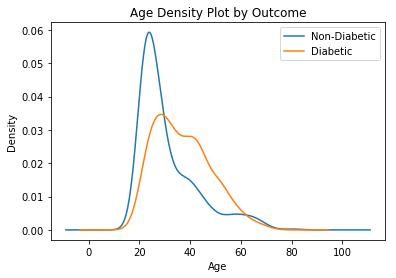

In [176]:
samples_classes = sorted(df['Outcome'].unique())
for sample in samples_classes:
    df.Age[df.Outcome == sample].plot(kind='kde')
plt.title('Age Density Plot by Outcome')
plt.xlabel('Age')
plt.legend(('Non-Diabetic', 'Diabetic'), loc='best')

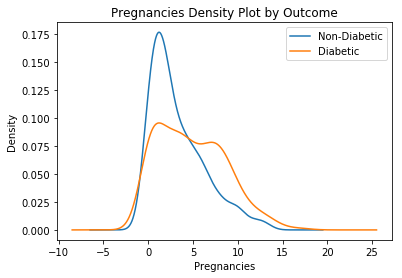

In [178]:
samples_classes = sorted(df['Outcome'].unique())
for sample in samples_classes:
    df.Pregnancies[df.Outcome == sample].plot(kind='kde')
plt.title('Pregnancies Density Plot by Outcome')
plt.xlabel('Pregnancies')
plt.legend(('Non-Diabetic', 'Diabetic'), loc='best')

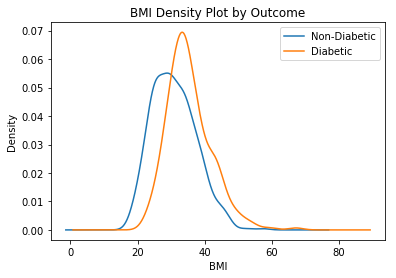

In [177]:
samples_classes = sorted(df['Outcome'].unique())
for sample in samples_classes:
    df_train.BMIFill[df.Outcome == sample].plot(kind='kde')
plt.title('BMI Density Plot by Outcome')
plt.xlabel('BMI')
plt.legend(('Non-Diabetic', 'Diabetic'), loc='best')

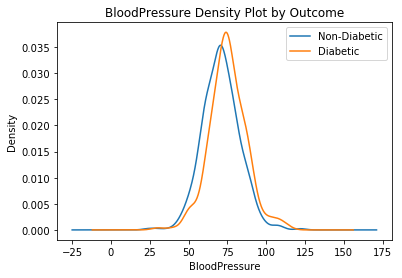

In [179]:
samples_classes = sorted(df['Outcome'].unique())
for sample in samples_classes:
    df_train.BloodPressureFill[df.Outcome == sample].plot(kind='kde')
plt.title('BloodPressure Density Plot by Outcome')
plt.xlabel('BloodPressure')
plt.legend(('Non-Diabetic', 'Diabetic'), loc='best')

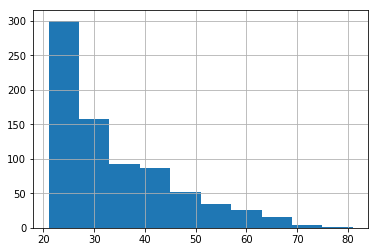

In [199]:
df['Age'].hist()

In [202]:
df['Age'].values

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31,
       31, 33, 32, 27, 50, 41, 29, 51, 41, 43, 22, 57, 38, 60, 28, 22, 28,
       45, 33, 35, 46, 27, 56, 26, 37, 48, 54, 40, 25, 29, 22, 31, 24, 22,
       26, 30, 58, 42, 21, 41, 31, 44, 22, 21, 39, 36, 24, 42, 32, 38, 54,
       25, 27, 28, 26, 42, 23, 22, 22, 41, 27, 26, 24, 22, 22, 36, 22, 37,
       27, 45, 26, 43, 24, 21, 34, 42, 60, 21, 40, 24, 22, 23, 31, 33, 22,
       21, 24, 27, 21, 27, 37, 25, 24, 24, 46, 23, 25, 39, 61, 38, 25, 22,
       21, 25, 24, 23, 69, 23, 26, 30, 23, 40, 62, 33, 33, 30, 39, 26, 31,
       21, 22, 29, 28, 55, 38, 22, 42, 23, 21, 41, 34, 65, 22, 24, 37, 42,
       23, 43, 36, 21, 23, 22, 47, 36, 45, 27, 21, 32, 41, 22, 34, 29, 29,
       36, 29, 25, 23, 33, 36, 42, 26, 47, 37, 32, 23, 21, 27, 40, 41, 60,
       33, 31, 25, 21, 40, 36, 40, 42, 29, 21, 23, 26, 29, 21, 28, 32, 27,
       55, 27, 57, 52, 21, 41, 25, 24, 60, 24, 36, 38, 25, 32, 32, 41, 21,
       66, 37, 61, 26, 22

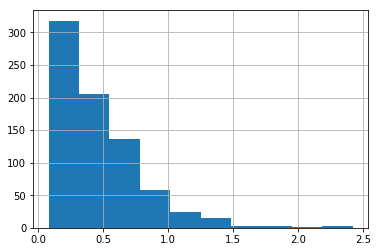

In [185]:
df['DiabetesPedigreeFunction'].hist()

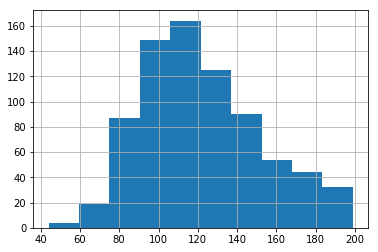

In [186]:
df_train['GlucoseFill'].hist()

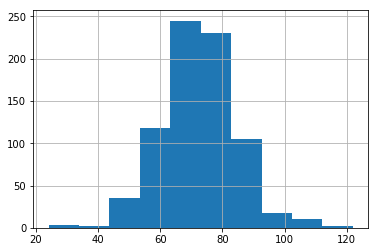

In [187]:
df_train['BloodPressureFill'].hist()

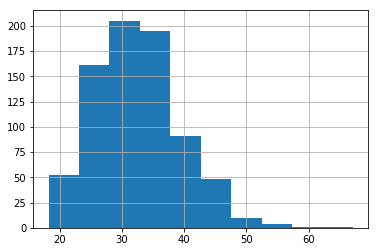

In [188]:
df_train['BMIFill'].hist()

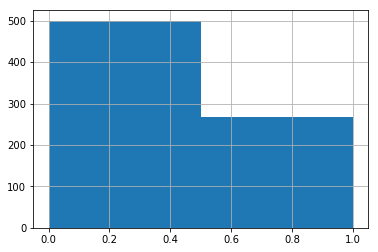

In [193]:
df['Outcome'].hist(bins = 2)

Distribution need to be disscus later

In [251]:
df_clean.describe()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.443534,32.008608,121.176471,72.005739,32.449641,3.727403,0.381636
std,0.286457,10.362811,29.999169,11.487248,6.723821,3.237755,0.486137
min,0.078000,21.000000,44.000000,24.000000,18.200000,0.000000,0.000000
25%,0.239000,24.000000,99.000000,64.000000,27.600000,1.000000,0.000000
50%,0.362000,28.000000,116.000000,72.000000,32.300000,3.000000,0.000000
75%,0.593000,39.000000,140.000000,78.000000,36.500000,6.000000,1.000000
max,2.420000,70.000000,199.000000,114.000000,67.100000,17.000000,1.000000


In [252]:
corr = df_clean[df_train.columns].corr()

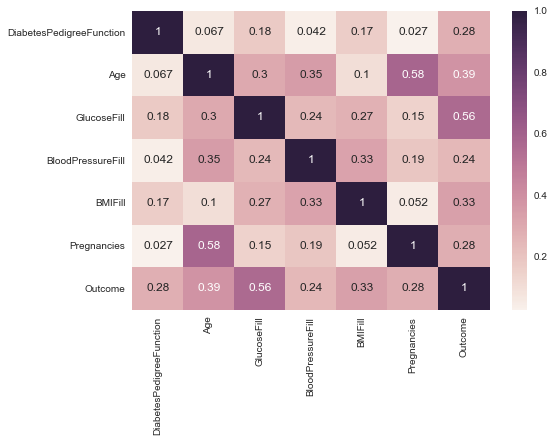

In [253]:
import seaborn as sns
sns.heatmap(corr, annot = True)

In [254]:
df_clean.corr()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
DiabetesPedigreeFunction,1.000000,0.066575,0.175714,0.041632,0.167100,0.027084,0.276199
Age,0.066575,1.000000,0.301493,0.346401,0.102584,0.582795,0.388079
GlucoseFill,0.175714,0.301493,1.000000,0.241689,0.268450,0.148316,0.559499
BloodPressureFill,0.041632,0.346401,0.241689,1.000000,0.325614,0.190626,0.244286
BMIFill,0.167100,0.102584,0.268450,0.325614,1.000000,0.052345,0.332787
Pregnancies,0.027084,0.582795,0.148316,0.190626,0.052345,1.000000,0.284355
Outcome,0.276199,0.388079,0.559499,0.244286,0.332787,0.284355,1.000000


In [255]:
df_clean.to_csv("diabetes_preprocessed.csv",index=False, header=True)